In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import json
import ast
from wordcloud import WordCloud, STOPWORDS
sns.set_style('whitegrid')
sns.set(font_scale=1.25)

Luego, cargar el archivo movies.csv en un DataFrame:

In [136]:
movies = pd.read_csv('movies_dataset.csv')

C:\Users\PC1\AppData\Local\Temp\ipykernel_4696\3779985946.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv('movies_dataset.csv')


In [137]:
#Hacemos una copia
df = movies.copy()

In [138]:
#Vemos la dimensionalidad del dataframe
df.shape

(45466, 24)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [140]:
# Eliminamos las columna que no nos sirven
df = df.drop(["original_title", "imdb_id", "adult", "poster_path", "homepage"], axis=1)

In [141]:
df[df['revenue'] == 0].shape

(38052, 19)

In [142]:
# reemplazamos 0 por NaN
df['revenue'] = df['revenue'].replace(0, np.nan)

In [143]:
#convertimos los valores de la columna 'budget' en numéricos, 
#reemplazando los valores 0 por NaN
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['budget'] = df['budget'].replace(0, np.nan)
df[df['budget'].isnull()].shape

(36576, 19)

In [144]:
# Creamos la columna return
df['return'] = df['revenue'] / df['budget']
df[df['return'].isnull()].shape

(40085, 20)

In [145]:
#Creamos la columna "Year" extrayendo de la columna "release_date"
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

Comenzando el Explore Data Analysis (EDA)

In [146]:
# Convertimos "title" y "overview" a cadena de texto
df['title'] = df['title'].astype('str')
df['overview'] = df['overview'].astype('str')

In [147]:
# generamos dos cadenas de texto con las palabras de la columna "titulo" y "overview"
titulo_palabras = ' '.join(df['title'])
overview_palabras = ' '.join(df['overview'])

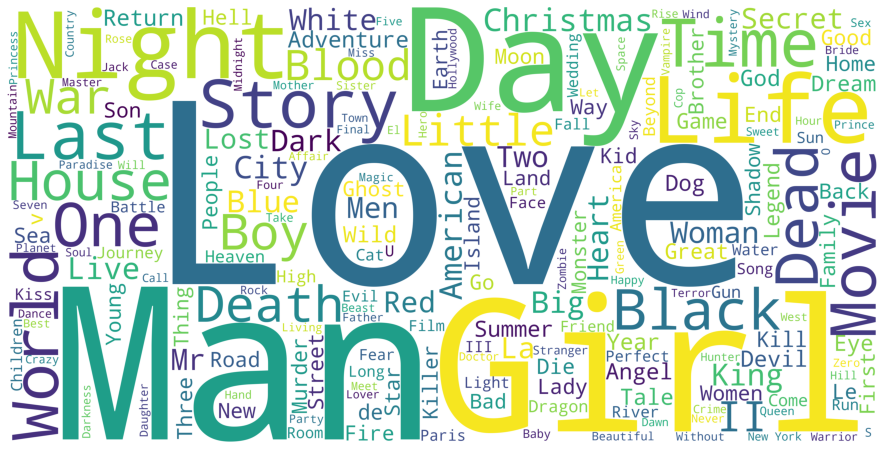

In [148]:
#Creamos el wordcloud de la columna titulo
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(titulo_palabras)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

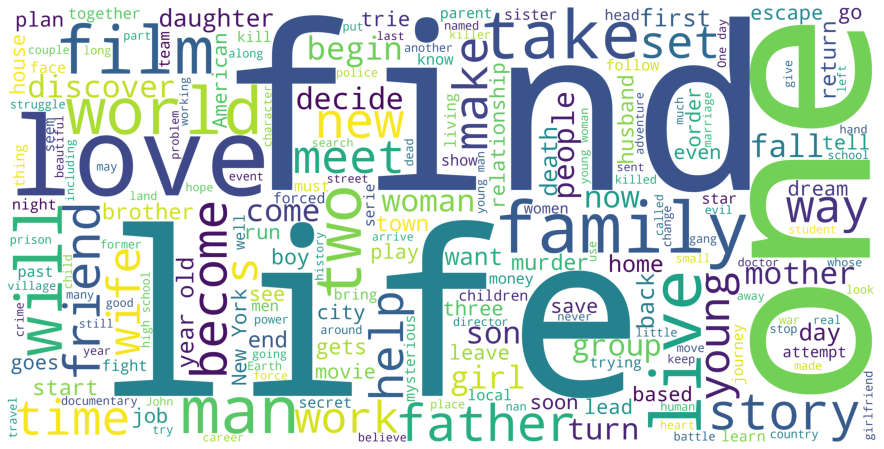

In [149]:
#Creamos la nube de palabras de la columna "overview"
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_palabras)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

In [150]:
#Limpiamos la columna belongs_to_collection
df_franquicia = df[df['belongs_to_collection'].notnull()]
df_franquicia['belongs_to_collection'] = df_franquicia['belongs_to_collection'].apply(ast.literal_eval).apply(lambda x: x['name'] if isinstance(x, dict) else np.nan)
df_franquicia = df_franquicia[df_franquicia['belongs_to_collection'].notnull()]

C:\Users\PC1\AppData\Local\Temp\ipykernel_4696\2507226053.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_franquicia['belongs_to_collection'] = df_franquicia['belongs_to_collection'].apply(ast.literal_eval).apply(lambda x: x['name'] if isinstance(x, dict) else np.nan)


In [151]:
# Creamos una tabla dinamica y obtenemos las franquicias con mayores ingresos
fran_pivot = df_franquicia.pivot_table(index='belongs_to_collection', values='revenue', aggfunc={'revenue': ['mean', 'sum', 'count']}).reset_index()
fran_pivot.sort_values('sum', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
646,James Bond Collection,26,2.733450e+08,7.106970e+09
1317,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09
1550,Transformers Collection,5,8.732202e+08,4.366101e+09
325,Despicable Me Collection,4,9.227676e+08,3.691070e+09
1491,The Twilight Collection,5,6.684215e+08,3.342107e+09
610,Ice Age Collection,5,6.433417e+08,3.216709e+09
666,Jurassic Park Collection,4,7.578710e+08,3.031484e+09


In [152]:
# Franquicias de películas más taquilleras
fran_pivot.sort_values('sum', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
646,James Bond Collection,26,2.733450e+08,7.106970e+09
1317,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09
1550,Transformers Collection,5,8.732202e+08,4.366101e+09
325,Despicable Me Collection,4,9.227676e+08,3.691070e+09
1491,The Twilight Collection,5,6.684215e+08,3.342107e+09
610,Ice Age Collection,5,6.433417e+08,3.216709e+09
666,Jurassic Park Collection,4,7.578710e+08,3.031484e+09


In [153]:
# Franquicias más exitosas (Average Gross)
fran_pivot.sort_values('mean', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
112,Avatar Collection,1,2.787965e+09,2.787965e+09
1245,The Avengers Collection,2,1.462481e+09,2.924962e+09
479,Frozen Collection,1,1.274219e+09,1.274219e+09
446,Finding Nemo Collection,2,9.844532e+08,1.968906e+09
1352,The Hobbit Collection,3,9.785078e+08,2.935523e+09
1388,The Lord of the Rings Collection,3,9.721816e+08,2.916545e+09
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
325,Despicable Me Collection,4,9.227676e+08,3.691070e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09


Budget

In [154]:
df['budget'].describe()

count    8.890000e+03
mean     2.160428e+07
std      3.431063e+07
min      1.000000e+00
25%      2.000000e+06
50%      8.000000e+06
75%      2.500000e+07
max      3.800000e+08
Name: budget, dtype: float64

C:\Users\PC1\AppData\Local\Temp\ipykernel_4696\996204680.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['budget'].notnull()]['budget'], kde=True)


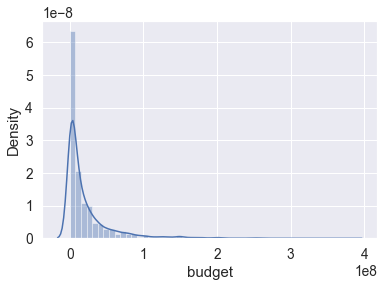

In [155]:
sns.distplot(df[df['budget'].notnull()]['budget'], kde=True)
plt.show()

Genres

In [156]:
# Limpiamos la columna "genres" y extraemos los nombres de los géneros
df['genres'] = df['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [157]:
# Creamos una serie
s = df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'

C:\Users\PC1\AppData\Local\Temp\ipykernel_4696\4287641280.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)


In [158]:
# Eliminamos genres de nuestro DF y la reemplazamos por la columna que creamos anteriormente
gen_df = df.drop('genres', axis=1).join(s)
gen_df['genre'].value_counts().shape[0]

32

In [159]:
# Creamos un dataframe llamada pop_gen que contiene la frecuencia de cada genero
pop_gen = pd.DataFrame(gen_df['genre'].value_counts()).reset_index()
pop_gen.columns = ['genre', 'movies']
pop_gen.head(10)

,genre,movies
0,Drama,20265
1,Comedy,13182
2,Thriller,7624
3,Romance,6735
4,Action,6596
5,Horror,4673
6,Crime,4307
7,Documentary,3932
8,Adventure,3496
9,Science Fiction,3049


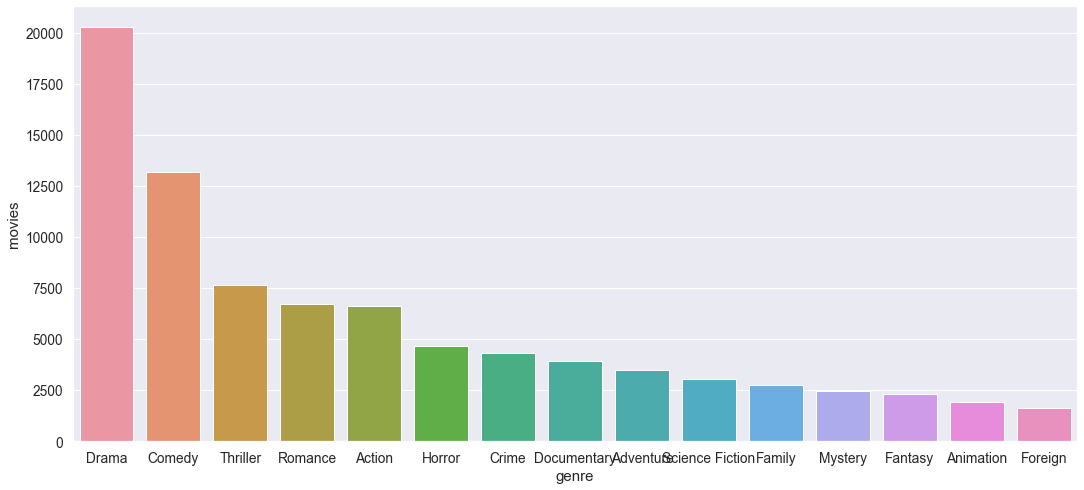

In [160]:
plt.figure(figsize=(18,8))
sns.barplot(x='genre', y='movies', data=pop_gen.head(15))
plt.show()

In [161]:
#Hacemos una lista de los principales generos
principal_generos = ['Drama', 'Comedy', 'Thriller', 'Romance', 'Action', 'Horror', 'Crime', 'Science Fiction', 'Fantasy', 'Animation']
principal_pelis = gen_df[(gen_df['genre'].isin(principal_generos))]

<Figure size 1296x576 with 0 Axes>

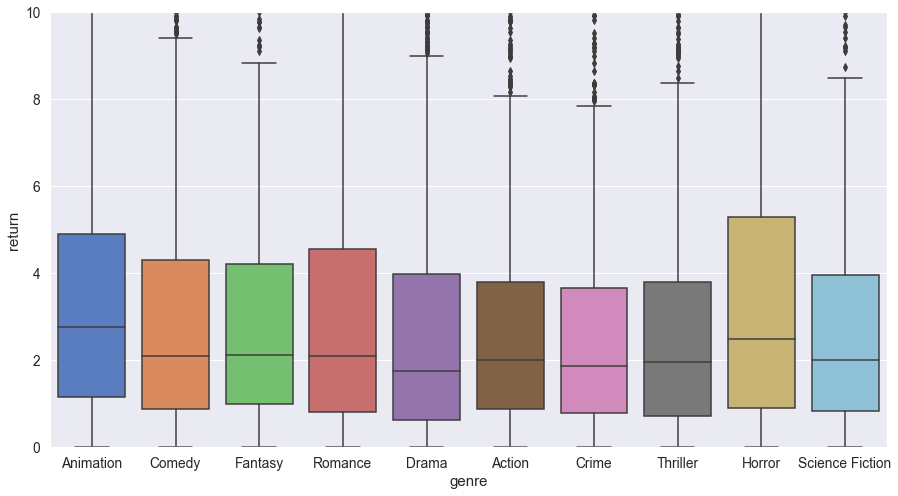

In [162]:
#Generos que presentan mayores retornos
plt.figure(figsize=(18,8))
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='genre', y='return', data=principal_pelis, palette="muted", ax =ax)
ax.set_ylim([0, 10])
plt.show()

Original language

In [163]:
#Contamos el número de idiomas originales únicos 
#presentes en la columna 'original_language' 
df['original_language'].drop_duplicates().shape[0]

93

In [164]:
#creamos un nuevo DataFrame llamado 'language_df'
language_df = pd.DataFrame(df['original_language'].value_counts())
language_df['language'] = language_df.index
language_df.columns = ['number', 'language']
language_df.head()

,number,language
en,32269,en
fr,2438,fr
it,1529,it
ja,1350,ja
de,1080,de


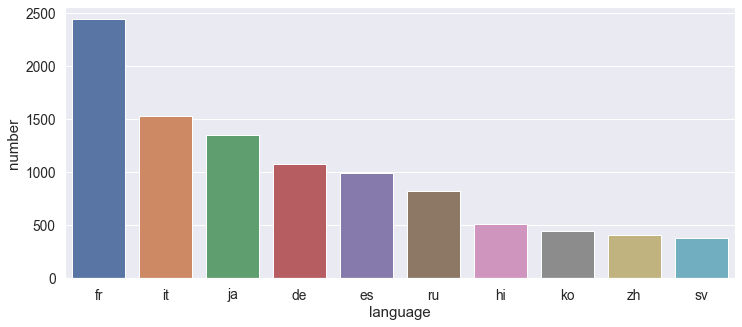

In [165]:
plt.figure(figsize=(12,5))
sns.barplot(x='language', y='number', data=language_df.iloc[1:11])
plt.show()

Popularity, Vote Average y Vote Count

In [166]:
#Creamos un función para transformar los tipos de datos y reemplazar los no numericos a NaN
def numericos_nan(x):
    try:
        return float(x)
    except:
        return np.nan

In [167]:
# Corremos la función en estas tres columnas
df['popularity'] = df['popularity'].apply(numericos_nan).astype('float')
df['vote_count'] = df['vote_count'].apply(numericos_nan).astype('float')
df['vote_average'] = df['vote_average'].apply(numericos_nan).astype('float')

In [168]:
df['popularity'].describe()

count    45460.000000
mean         2.921478
std          6.005414
min          0.000000
25%          0.385948
50%          1.127685
75%          3.678902
max        547.488298
Name: popularity, dtype: float64

In [169]:
df['vote_count'].describe()

count    45460.000000
mean       109.897338
std        491.310374
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

In [170]:
df['vote_average'] = df['vote_average'].replace(0, np.nan)
df['vote_average'].describe()

count    42462.000000
mean         6.014877
std          1.256208
min          0.500000
25%          5.300000
50%          6.100000
75%          6.900000
max         10.000000
Name: vote_average, dtype: float64

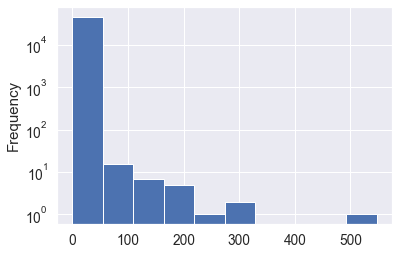

In [171]:
df['popularity'].plot(logy=True, kind='hist')
plt.show()

La puntuación de popularidad parece ser una cantidad extremadamente sesgada con una media de solo 2,9 pero los valores máximos alcanzan los 547, que es casi un 1800 % mayor que la media. Sin embargo, como puede verse en el gráfico de distribución, casi todas las películas tienen una puntuación de popularidad inferior a 10 (el percentil 75 está en 3,678902).

In [172]:
#Peliculas más populares
df[['title', 'popularity', 'year']].sort_values('popularity', ascending=False).head(10)

,title,popularity,year
30700,Minions,547.488298,2015
33356,Wonder Woman,294.337037,2017
42222,Beauty and the Beast,287.253654,2017
43644,Baby Driver,228.032744,2017
24455,Big Hero 6,213.849907,2014
26564,Deadpool,187.860492,2016
26566,Guardians of the Galaxy Vol. 2,185.330992,2017
14551,Avatar,185.070892,2009
24351,John Wick,183.870374,2014
23675,Gone Girl,154.801009,2014


In [173]:
#Pelicula más votada
df[['title', 'vote_count', 'year']].sort_values('vote_count', ascending=False).head(10)

,title,vote_count,year
15480,Inception,14075.0,2010
12481,The Dark Knight,12269.0,2008
14551,Avatar,12114.0,2009
17818,The Avengers,12000.0,2012
26564,Deadpool,11444.0,2016
22879,Interstellar,11187.0,2014
20051,Django Unchained,10297.0,2012
23753,Guardians of the Galaxy,10014.0,2014
2843,Fight Club,9678.0,1999
18244,The Hunger Games,9634.0,2012


C:\Users\PC1\AppData\Local\Temp\ipykernel_4696\1411771687.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['vote_average'].fillna(df['vote_average'].median()))


<AxesSubplot: xlabel='vote_average', ylabel='Density'>

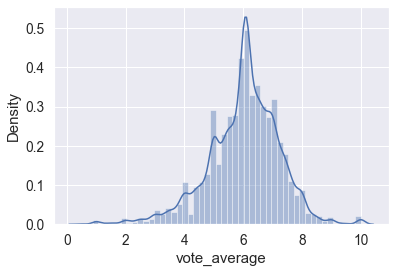

In [174]:
sns.distplot(df['vote_average'].fillna(df['vote_average'].median()))

In [175]:
#Más aclamados por la critica
df[df['vote_count'] > 2000][['title', 'vote_average', 'vote_count' ,'year']].sort_values('vote_average', ascending=False).head(10)

,title,vote_average,vote_count,year
314,The Shawshank Redemption,8.5,8358.0,1994
834,The Godfather,8.5,6024.0,1972
2211,Life Is Beautiful,8.3,3643.0,1997
5481,Spirited Away,8.3,3968.0,2001
1152,One Flew Over the Cuckoo's Nest,8.3,3001.0,1975
1176,Psycho,8.3,2405.0,1960
2843,Fight Club,8.3,9678.0,1999
1178,The Godfather: Part II,8.3,3418.0,1974
12481,The Dark Knight,8.3,12269.0,2008
292,Pulp Fiction,8.3,8670.0,1994


In [176]:
# Listas con los nombres de los meses y dias
meses_orden = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Setiembre', 'Octubre', 'Noviembre', 'Diciembre']
dias_orden = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']

In [177]:
# Funcion para obtener el mes
def mes_obt(x):
    try:
        return meses_orden[int(str(x).split('-')[1]) - 1]
    except:
        return np.nan

In [178]:
# Funcion para obtener el dia
def dia_obt(x):
    try:
        year, month, day = (int(i) for i in x.split('-'))    
        answer = datetime.date(year, month, day).weekday()
        return dias_orden[answer]
    except:
        return np.nan

In [179]:
# Agregamos las columnas day y month al df
df['day'] = df['release_date'].apply(dia_obt)
df['month'] = df['release_date'].apply(mes_obt)

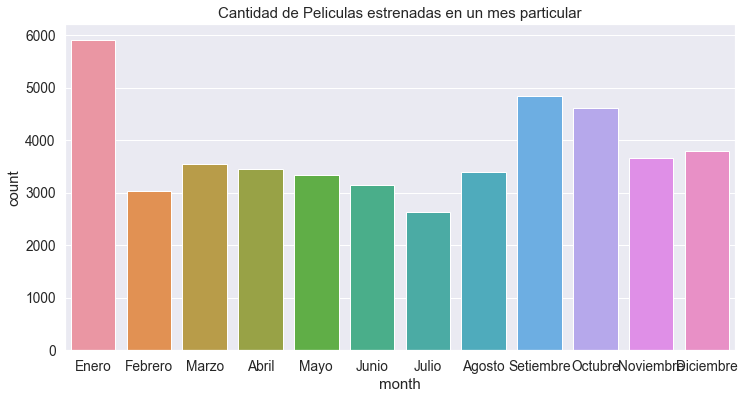

In [180]:
plt.figure(figsize=(12,6))
plt.title("Cantidad de Peliculas estrenadas en un mes particular")
sns.countplot(x='month', data=df, order=meses_orden)
plt.show()

<AxesSubplot: title={'center': 'Cantidad de peliculas estrenadas en un día en particular'}, xlabel='day', ylabel='count'>

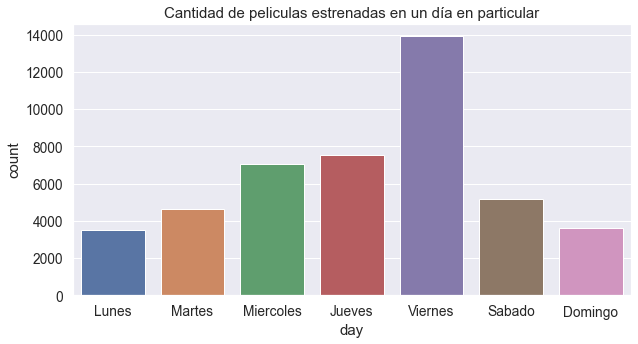

In [181]:
plt.figure(figsize=(10,5))
plt.title("Cantidad de peliculas estrenadas en un día en particular")
sns.countplot(x='day', data=df, order=dias_orden)

<AxesSubplot: xlabel='year'>

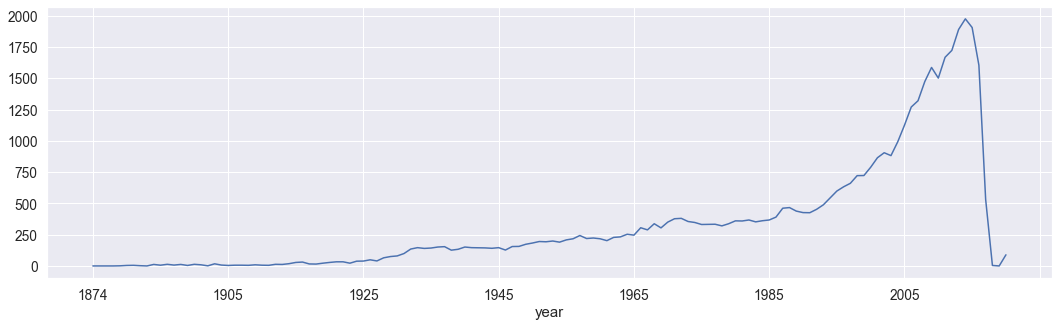

In [182]:
# Nos muestra la cantidad de peliculas estrenadas en años
year_count = df.groupby('year')['title'].count()
plt.figure(figsize=(18,5))
year_count.plot()

Movie Status

In [183]:
#Vemos los estados de las peliculas 
df['status'].value_counts()

Released           45014
Rumored              230
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: status, dtype: int64

Runtime

In [184]:
df['runtime'].describe()

count    45203.000000
mean        94.128199
std         38.407810
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64

In [185]:
df['runtime'] = df['runtime'].astype('float')

C:\Users\PC1\AppData\Local\Temp\ipykernel_4696\1721577354.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['runtime'] < 300) & (df['runtime'] > 0)]['runtime'])


<AxesSubplot: xlabel='runtime', ylabel='Density'>

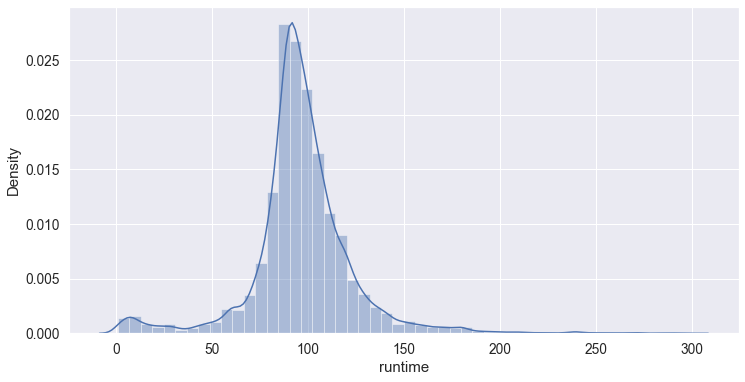

In [186]:
plt.figure(figsize=(12,6))
sns.distplot(df[(df['runtime'] < 300) & (df['runtime'] > 0)]['runtime'])

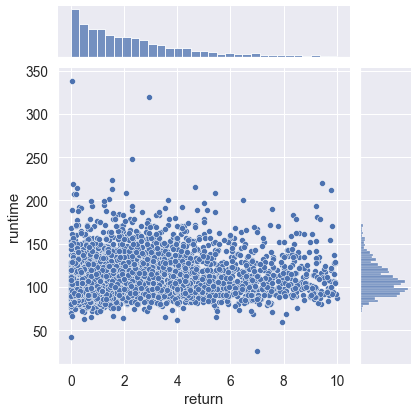

In [187]:
df_matriz = df[(df['return'].notnull()) & (df['runtime'] > 0) & (df['return'] < 10)]
sns.jointplot(x='return', y='runtime', data=df_matriz)
plt.show()

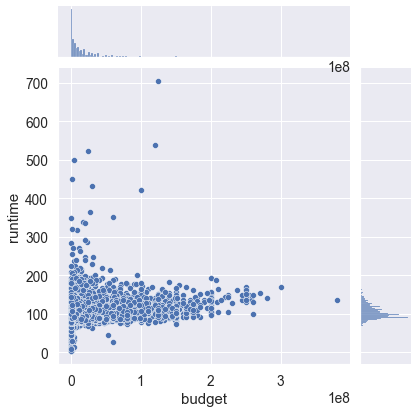

In [188]:
df_matriz = df[(df['budget'].notnull()) & (df['runtime'] > 0)]
sns.jointplot(x='budget', y='runtime', data=df_matriz)
plt.show()

Production Companies

In [189]:
# Desanidamos y remplazamos con listas vacias a los valores NaN de la columna "Production companies"
df['production_companies'] = df['production_companies'].fillna('[]').apply(ast.literal_eval)
df['production_companies'] = df['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [190]:
#Creamos una serie
s = df.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'companies'

C:\Users\PC1\AppData\Local\Temp\ipykernel_4696\843460365.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = df.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)


In [191]:
#Obtenemos información de la columna "Production_companies"
company_df = df.drop('production_companies', axis=1).join(s)
company_sum = pd.DataFrame(company_df.groupby('companies')['revenue'].sum().sort_values(ascending=False))
company_sum.columns = ['Total']
company_mean = pd.DataFrame(company_df.groupby('companies')['revenue'].mean().sort_values(ascending=False))
company_mean.columns = ['Average']
company_count = pd.DataFrame(company_df.groupby('companies')['revenue'].count().sort_values(ascending=False))
company_count.columns = ['Number']

company_pivot = pd.concat((company_sum, company_mean, company_count), axis=1)

In [192]:
# Compañias con mayores ingresos
company_pivot.sort_values('Total', ascending=False).head(10)

,Total,Average,Number
companies,,,
Warner Bros.,6.352519e+10,1.293792e+08,491
Universal Pictures,5.525919e+10,1.193503e+08,463
Paramount Pictures,4.880819e+10,1.235650e+08,395
Twentieth Century Fox Film Corporation,4.768775e+10,1.398468e+08,341
Walt Disney Pictures,4.083727e+10,2.778046e+08,147
Columbia Pictures,3.227974e+10,1.367785e+08,236
New Line Cinema,2.217339e+10,1.119868e+08,198
Amblin Entertainment,1.734372e+10,2.550547e+08,68
DreamWorks SKG,1.547575e+10,1.984071e+08,78


In [193]:
# Compañias más exitosas
company_pivot[company_pivot['Number'] >= 15].sort_values('Average', ascending=False).head(10)

,Total,Average,Number
companies,,,
Pixar Animation Studios,1.118853e+10,6.215852e+08,18
Marvel Studios,1.169964e+10,6.157703e+08,19
Revolution Sun Studios,8.120339e+09,5.413559e+08,15
Lucasfilm,9.898421e+09,4.499282e+08,22
DreamWorks Animation,1.370752e+10,4.031622e+08,34
DC Entertainment,6.212609e+09,3.882880e+08,16
Dentsu,6.853205e+09,3.807336e+08,18
Jerry Bruckheimer Films,8.957441e+09,3.732267e+08,24
Marvel Enterprises,6.538067e+09,3.441088e+08,19


In [194]:
df['year'] = df['year'].replace('NaT', np.nan)
df['year'] = df['year'].apply(numericos_nan)

Vemos la correlación entre las columnas

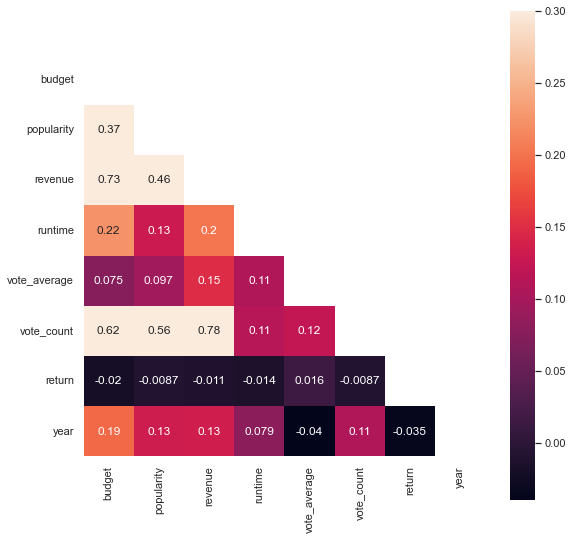

In [195]:
# Identificamos columnas redundantes
sns.set(font_scale=1)
corr = df.corr()
mascara = np.zeros_like(corr)
mascara[np.triu_indices_from(mascara)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(9,9))
    ax = sns.heatmap(corr, mask=mascara, vmax=.3, square=True, annot=True)